### Finding the number of genes on each chromosome in Xenopus.

So we have this pattern of some chromosomes being used for sex determination more often than others. . . but that could just reflect the number of genes that are present on each chromosome. 

So I want to make sure that there is no correlation between the number of genes and the number of species which use each chromosome.

To do this I am looking at the gff3 of the X. tropicalis v.9.0 assembly. As synteny is so well conserver, the assumption is that the gene content of Ranids should be similar to that of X. tropicalis. 

In [ ]:
mrps22
copb2
stmn4
ptk2b

In [1]:
## Read in the gff3

gff3 = open("/home/djeffrie/Data/Genomes/Xen/Xtropicalisv9.0.Named.primaryTrs.gff3", 'r').readlines()

gene_counts = {}


for line in gff3:
    if not "#" in line:
        if "gene" in line.split()[2]:
            Chrom = line.split()[0]
            if "Chr" in Chrom:
                
                if Chrom not in gene_counts:
                    gene_counts[Chrom] = 0
                
                gene_counts[Chrom] += 1
            
gene_counts


{'Chr01': 3196,
 'Chr02': 2646,
 'Chr03': 2639,
 'Chr04': 2325,
 'Chr05': 2074,
 'Chr06': 1645,
 'Chr07': 1940,
 'Chr08': 2436,
 'Chr09': 1785,
 'Chr10': 948}

In [2]:
### How many TURNOVERS TO each chromosome

sex_chrom_counts = {'Chr01': 0,
                    'Chr02': 2,
                    'Chr03': 2,
                    'Chr04': 0,
                    'Chr05': 5,
                    'Chr06': 0,
                    'Chr07': 0,
                    'Chr08': 1,
                    'Chr09': 0,
                    'Chr10': 0}


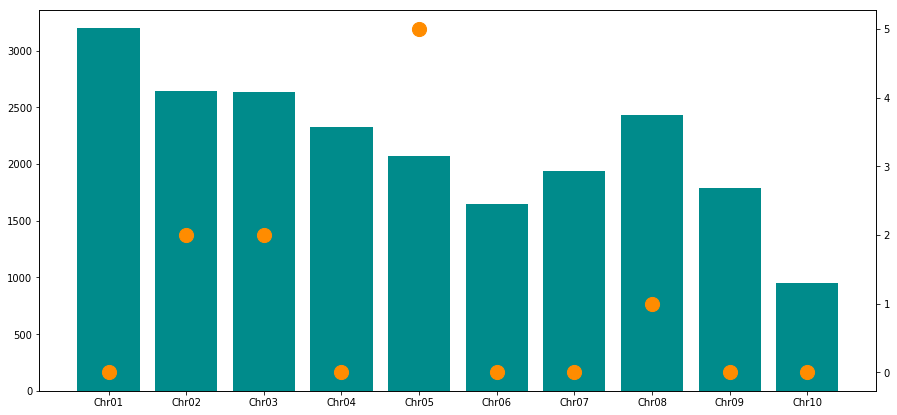

In [3]:
from matplotlib import pyplot as plt

bars = []
labs = []
points = []

for i in sorted(gene_counts.keys()):
    bars.append(gene_counts[i])
    labs.append(i)
    points.append(sex_chrom_counts[i])


fig, ax1 = plt.subplots(figsize = (15,7))
    
ax1.bar(range(1,11), bars, tick_label = labs, color= "darkcyan")
ax2 = ax1.twinx()
ax2.scatter(range(1,11), points, c = "darkorange", s = 200)

plt.savefig("/home/djeffrie/Data/Genomes/Xen/Genes_per_chrom.svg")
plt.show()

### Looks correlated - check

In [5]:
## Is there correlation here?
import sys
sys.path.append("/home/djeffrie/anaconda2/lib/python2.7/site-packages/")
import numpy as np
import statsmodels.api as sm
import pandas as pd
from statsmodels.graphics.regressionplots import abline_plot

In [6]:
## make dict of data series

dep = pd.Series(gene_counts)
var = pd.Series(sex_chrom_counts)

data_dict = {"gene_counts":dep,
             "SC_counts":var}

In [10]:
## make dataframe from dict

df = pd.DataFrame(data_dict)
df

,SC_counts,gene_counts
Chr01,0,3196
Chr02,2,2646
Chr03,2,2639
Chr04,0,2325
Chr05,5,2074
Chr06,0,1645
Chr07,0,1940
Chr08,1,2436
Chr09,0,1785
Chr10,0,948


In [11]:
### Regression model

# Note the difference in argument order
dep = sm.add_constant(dep)
model = sm.OLS(var, dep).fit()
predictions = model.predict(dep) # make the predictions by the model

In [12]:
# print stats
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.085
Method:                 Least Squares   F-statistic:                    0.2935
Date:                Sun, 15 Apr 2018   Prob (F-statistic):              0.603
Time:                        22:16:33   Log-Likelihood:                -18.387
No. Observations:                  10   AIC:                             40.77
Df Residuals:                       8   BIC:                             41.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0548      2.020     -0.027      0.979      -4.713       4.603
0              0.0005      0.001      0.542      0.603      -0.002       0.003
==============================================================================
Omnibus:                       13.890   Durbin-Watson:                   2.547
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.859
Skew:                           1.721   Prob(JB):                       0.0324
Kurtosis:                       5.148   Cond. No.                     8.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

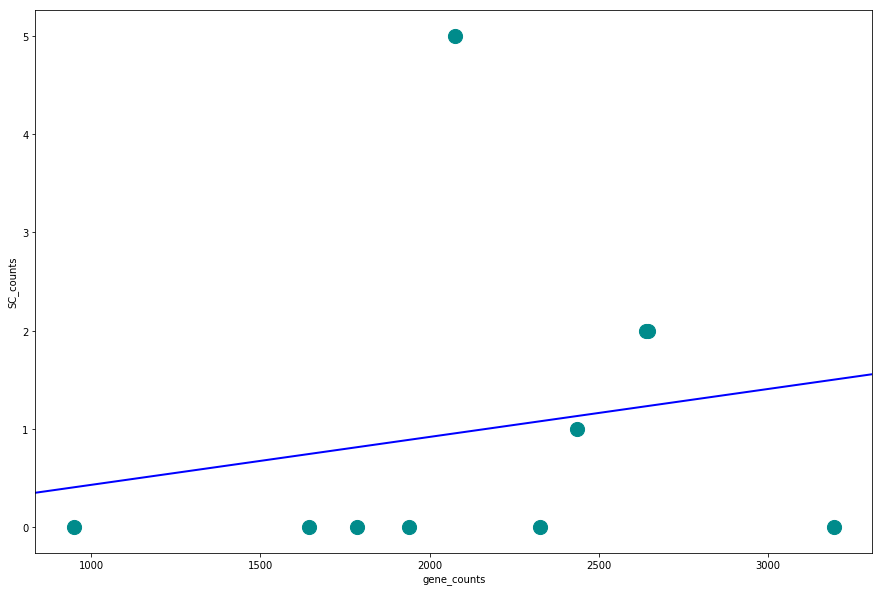

In [13]:
## Plot the relationship

f = plt.figure(figsize = (15,10))
ax1 = df.plot.scatter(ax = f.gca(), x = "gene_counts", y ="SC_counts", s = 200, color = "darkcyan")
abline_plot(model_results=model, ax=ax1, linewidth = 2, color = "blue")
plt.savefig("/home/djeffrie/Data/Genomes/Xen/Genes_per_chrom_reg.svg")
plt.show()

So no, not significantly correlated. 

### What would it look like if it were completely random??

I am going to sample genes from chromosomes 1000 times, sampling the same number of genes each time as there are sex determiners in the real dataset. I will then plot these and compare them to the real observed numbers. 

In [13]:
# Make a pool of "genes" to select from

genes = sum(gene_counts.values())

print "%s genes in total" % genes

gene_pool = []

for i in gene_counts:
    gene_pool = gene_pool + [i]*gene_counts[i]

## Check

from collections import Counter

Counter(gene_pool)



21634 genes in total


Counter({'Chr01': 3196,
         'Chr02': 2646,
         'Chr03': 2639,
         'Chr04': 2325,
         'Chr05': 2074,
         'Chr06': 1645,
         'Chr07': 1940,
         'Chr08': 2436,
         'Chr09': 1785,
         'Chr10': 948})

Number of "genes" per linkage group matches, onwards!

In [15]:
sex_chrom_counts

{'Chr01': 0,
 'Chr02': 2,
 'Chr03': 2,
 'Chr04': 0,
 'Chr05': 5,
 'Chr06': 0,
 'Chr07': 1,
 'Chr08': 1,
 'Chr09': 0,
 'Chr10': 0}

In [14]:
## How many sex determiners are in the dataset

N_sex_determiners = sum(sex_chrom_counts.values())
N_sex_determiners

11

Now randomly sample the genes (1000 times) and count how many from each chromosome are selected each time

In [16]:
import random

random_choices = {}

random_choices["Chr01"] = []
random_choices["Chr02"] = []
random_choices["Chr03"] = []
random_choices["Chr04"] = []
random_choices["Chr05"] = []
random_choices["Chr06"] = []
random_choices["Chr07"] = []
random_choices["Chr08"] = []
random_choices["Chr09"] = []
random_choices["Chr10"] = []


for i in range(1,1001):
    choice_rep = []
    for j in range(1,N_sex_determiners):
        choice_rep.append(random.choice(gene_pool))
        
    
    
    for i in random_choices:
        if i in Counter(choice_rep):
            random_choices[i].append(Counter(choice_rep)[i])
        else:
            random_choices[i].append(0)
        


And plot along with the number of genes per chrom and the real number of times each chromosome is used for sex determination

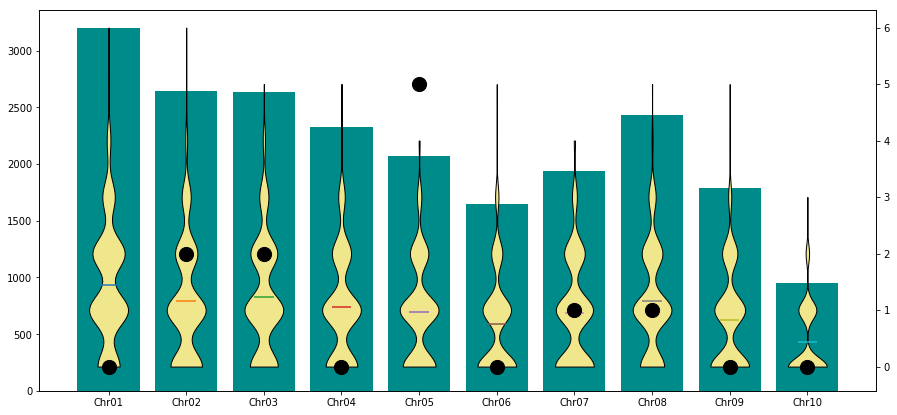

In [17]:
from matplotlib import pyplot as plt

bars = []
labs = []
points = []

for i in sorted(gene_counts.keys()):
    bars.append(gene_counts[i])
    labs.append(i)
    points.append(sex_chrom_counts[i])


fig, ax1 = plt.subplots(figsize = (15,7))
    
ax1.bar(range(1,11), bars, tick_label = labs, color= "darkcyan", zorder = 1)
ax2 = ax1.twinx()

for i in range(0,10):
    vio = ax2.violinplot(random_choices[sorted(random_choices.keys())[i]], positions=[i+1], showmeans = True, showextrema = False)
        
    for pc in vio['bodies']:
        pc.set_facecolor('khaki')
        pc.set_edgecolor('black')
        pc.set_zorder(2)    
        pc.set_alpha(1)

ax2.scatter(range(1,11), points, c = "black", s = 200, zorder = 3)
plt.savefig("/home/djeffrie/Data/Genomes/Xen/Genes_per_chrom_with_violins.svg")

plt.show()

So yes, the number of times each chromosome is used for sex correlates somewhat with the number of genes on the chromosome, but chromosome 5 is used many more times than would be expected by chance and Chr02 and Chr03 are also higher than expected . Also, importatantly, some chromosomes, most noteably Chr04 is never used, even though it has high gene number! So there is definitely a preference for some chromosomes that is not explained solely by chromosome size. 